In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it_prior_m.json"
script_name = "../scripts/run_fineweb1B_adam_fista_momentum.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,attn_momentum,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.672149,7.671067,7.671067,6029312.0,4456448.0,3.834277e+06,20,prior_m,0.001,False,0.05,50,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.620783,7.477214,7.619151,1712128.0,1212416.0,1.160666e+06,20,prior_m,0.001,False,0.01,5,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,13.265244,8.523752,13.259086,9895936.0,7143424.0,6.882179e+06,20,prior_m,0.001,False,0.01,50,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.893528,7.730746,7.891619,4227072.0,3506176.0,2.993592e+06,20,prior_m,0.001,False,0.005,5,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,4.021678,4.010827,4.010827,154.0,81.5,9.122742e+01,20,prior_m,0.001,False,0.1,0.1,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '10', '100', '5', '50'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


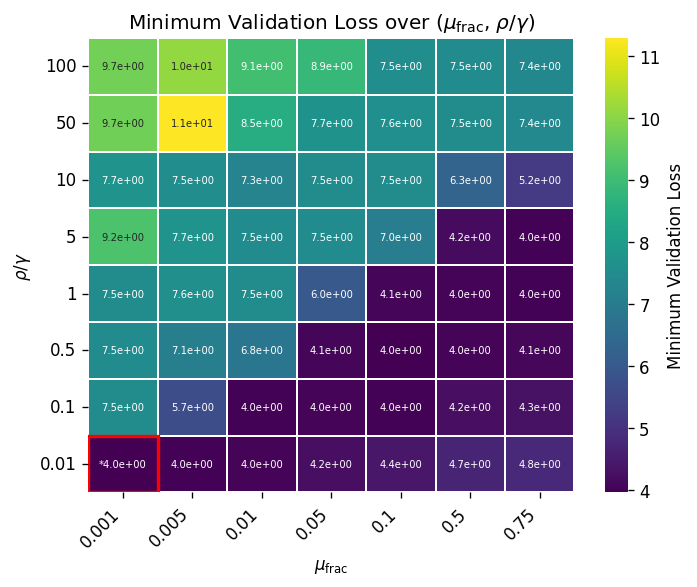

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


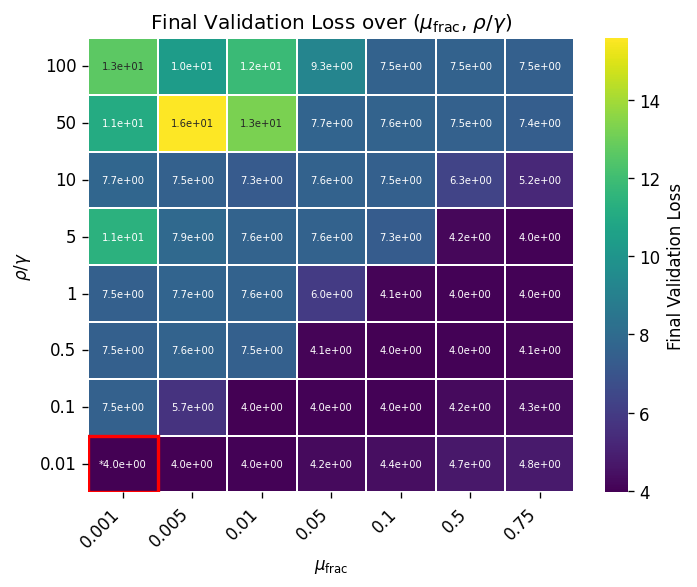

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss  kq_max mu_frac rho_over_lr
0      3.960202  6240.0   0.001        0.01
1      3.976330  1824.0     0.1         0.5
2      4.000901   280.0   0.005        0.01
3      4.003628  3312.0    0.01         0.1
4      4.005627  3248.0    0.75           5
5      4.007137   190.0    0.75           1
6      4.010827   154.0     0.1         0.1
7      4.018203   139.0     0.5         0.5
8      4.028305   239.0    0.05         0.1
9      4.030979   134.0    0.01        0.01


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


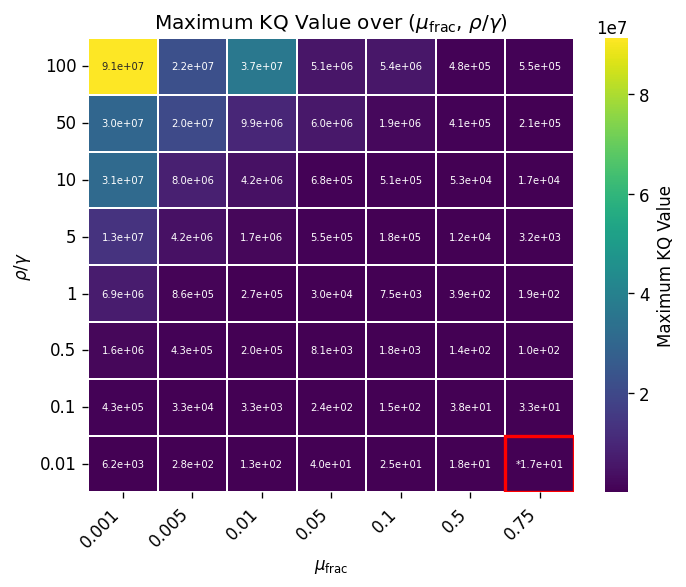

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:369: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:371: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


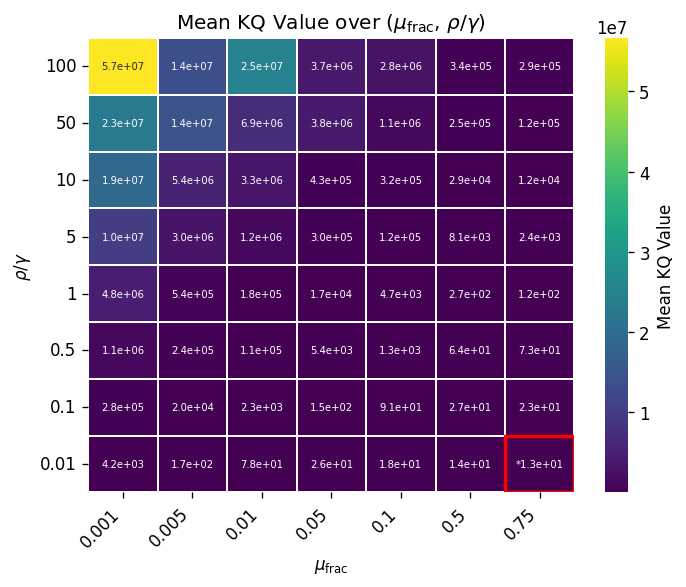

In [9]:
plot_heatmat_grid(df, value="kq_mean")